<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center>Coded Project</center></h1>

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations, collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret their impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition/Objective

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

 - Date: The date the news was released
 - News: The content of news articles that could potentially affect the company's stock price
 - Open: The stock price (in $) at the beginning of the day
 - High: The highest stock price (in $) reached during the day
 - Low: The lowest stock price (in $) reached during the day
 - Close: The adjusted stock price (in $) at the end of the day
 - Volume: The number of shares traded during the day
 - Label: The sentiment polarity of the news content
 - 1: Positive
 - 0: Neutral
 - -1: Negative


## Importing the necessary libraries

In [ ]:
pip uninstall gensim numpy -y

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2


In [ ]:
pip install numpy==1.24.4 gensim==4.3.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 16.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
xarray-einstats 0.9.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible

In [ ]:
pip install --upgrade --force-reinstall scipy==1.10.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 54.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 whic

In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# To encode the target variable
from sklearn.preprocessing import LabelEncoder

# To import Word2Vec
from gensim.models import Word2Vec

# To tune the model
from sklearn.model_selection import GridSearchCV

# Converting the Stanford GloVe model vector format to word2vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# To compute metrics to evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading the dataset

In [ ]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the dataset
df = pd.read_csv('/content/stock_news.csv')

In [ ]:
# creating a copy of the dataset
data = df.copy()

## Data Overview

### Checking the first five rows of the data

In [ ]:
# Print first 5 rows of data
data.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",41.740002,42.244999,41.482498,40.246914,130672400,-1


In [ ]:
# checking an article
data.loc[3, 'News']

' This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple'

### Checking the shape of the dataset

In [ ]:
# print shape of data
data.shape

(349, 8)

### Checking for missing values

In [ ]:
# Check for missing values
data.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


- There are no mising values in the data

### Checking the statistical summary

In [ ]:
data.describe()

,Open,High,Low,Close,Volume,Label
count,349.000000,349.000000,349.000000,349.000000,3.490000e+02,349.000000
mean,46.229233,46.700458,45.745394,44.926317,1.289482e+08,-0.054441
std,6.442817,6.507321,6.391976,6.398338,4.317031e+07,0.715119
min,37.567501,37.817501,37.305000,36.254131,4.544800e+07,-1.000000
25%,41.740002,42.244999,41.482498,40.246914,1.032720e+08,-1.000000
50%,45.974998,46.025002,45.639999,44.596924,1.156272e+08,0.000000
75%,50.707500,50.849998,49.777500,49.110790,1.511252e+08,0.000000
max,66.817497,67.062500,65.862503,64.805229,2.444392e+08,1.000000


- There seem to a large number of articles from the sports category

## Exploratory Data Analysis (EDA)


In [ ]:
 # function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

/tmp/ipython-input-10-3020376056.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


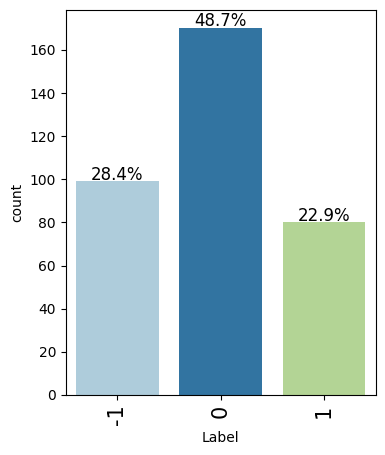

In [ ]:
labeled_barplot(data, "Label", perc=True)

/tmp/ipython-input-10-3020376056.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


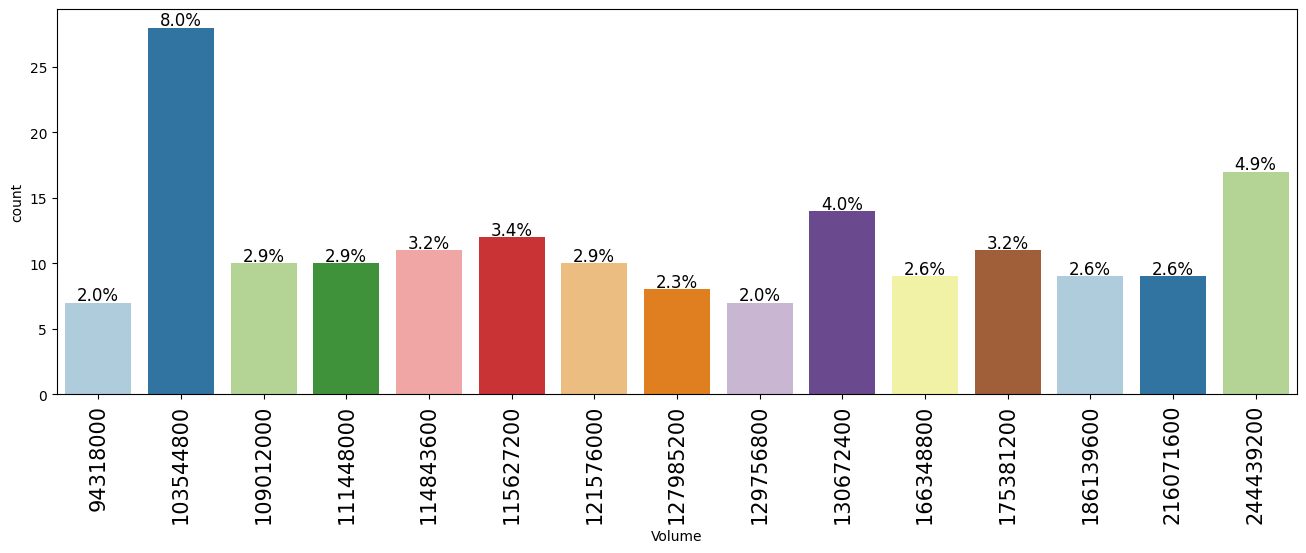

In [ ]:
labeled_barplot(data, "Volume", perc=True, n = 15)

/tmp/ipython-input-10-3020376056.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


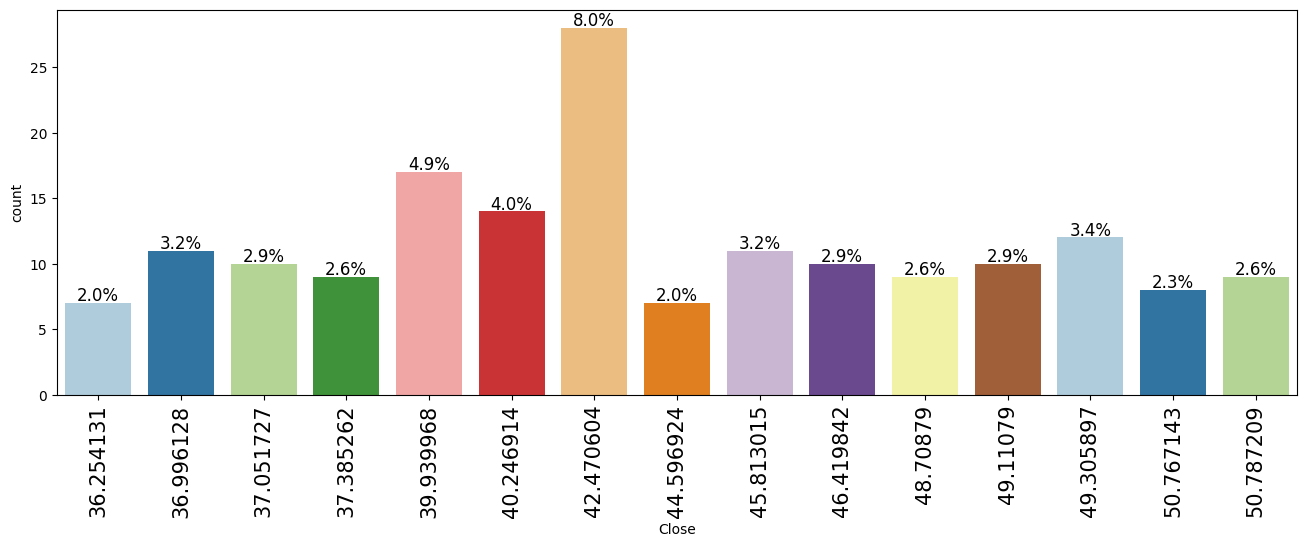

In [ ]:
labeled_barplot(data, "Close", perc=True, n = 15)

/tmp/ipython-input-10-3020376056.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


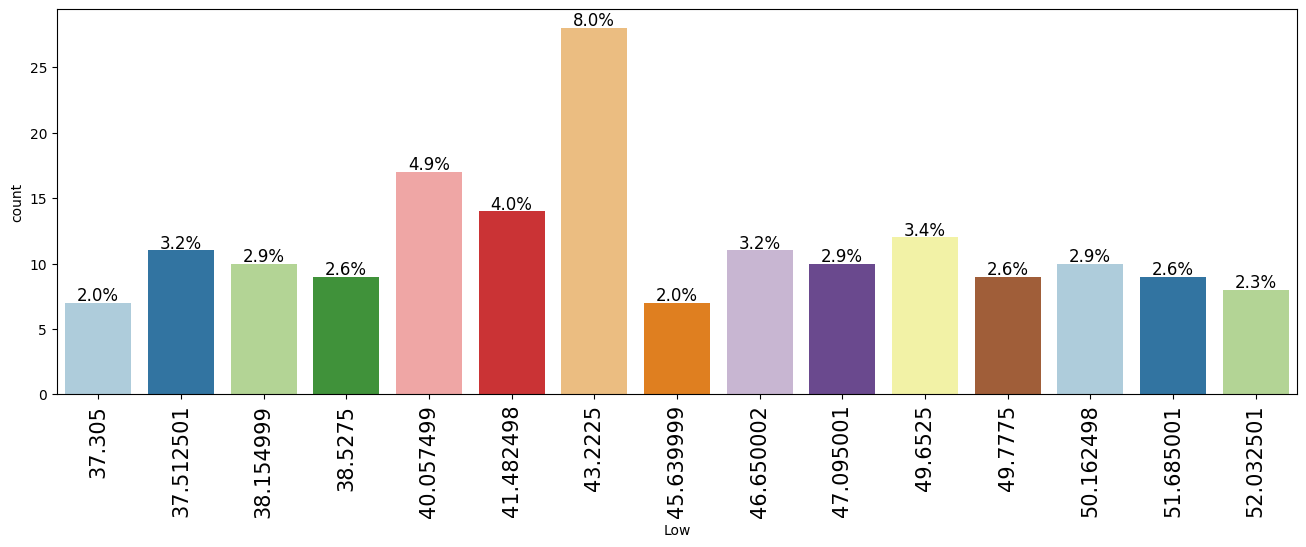

In [ ]:
labeled_barplot(data, "Low", perc=True, n = 15)

/tmp/ipython-input-10-3020376056.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


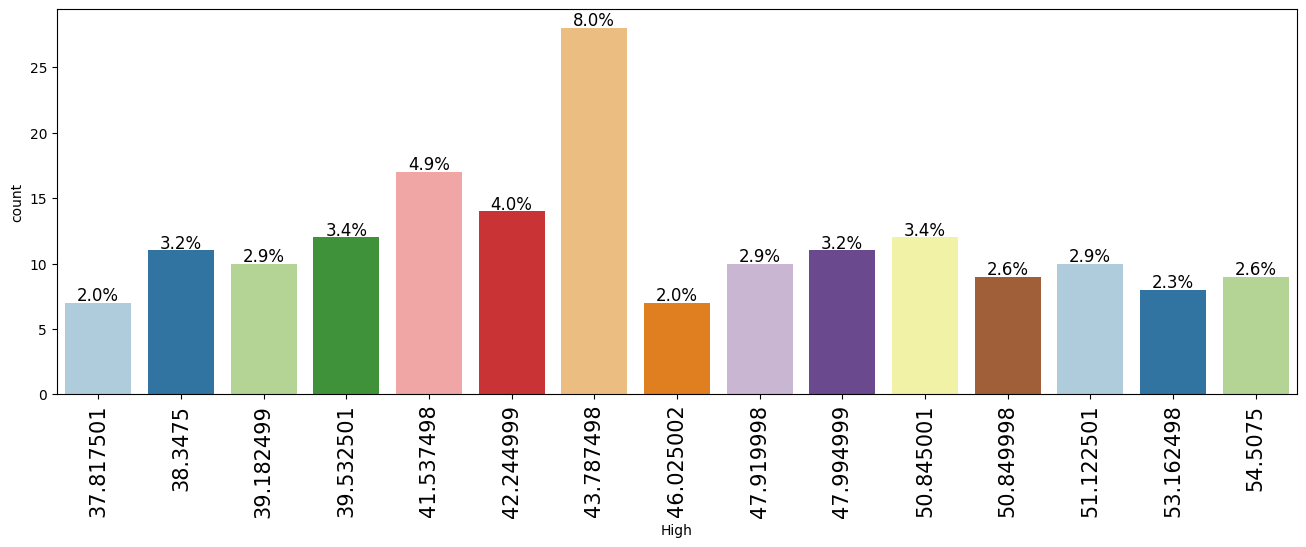

In [ ]:
labeled_barplot(data, "High", perc=True, n = 15)

/tmp/ipython-input-10-3020376056.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


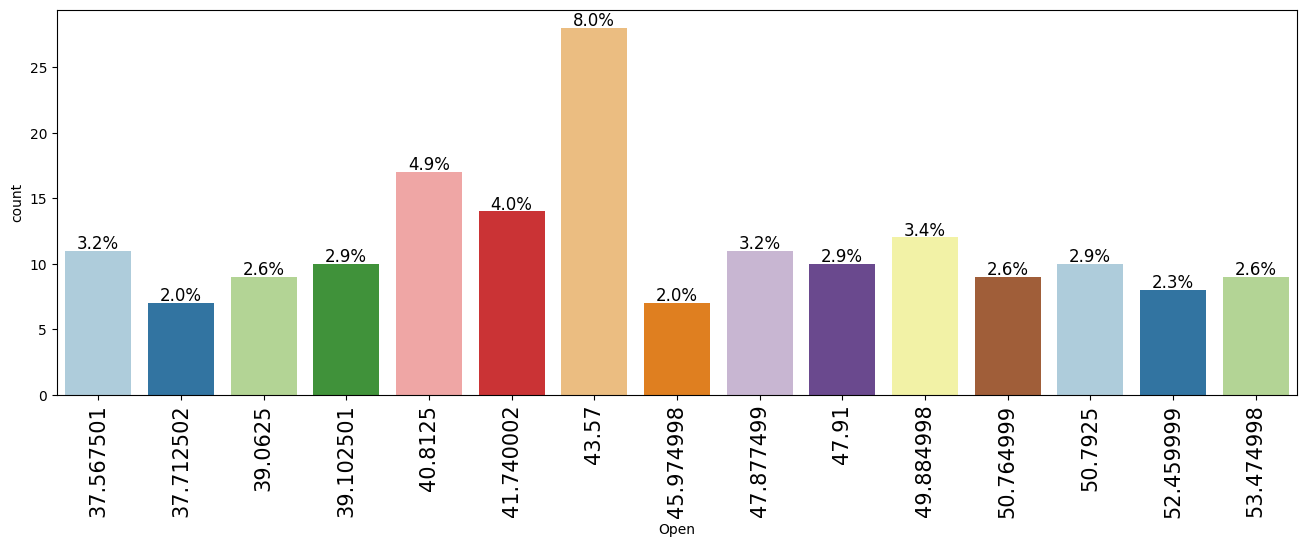

In [ ]:
labeled_barplot(data, "Open", perc=True, n = 15)

- Majority of the articles in the data are sports articles (53%), followed by news articles (~40%)

### Bivariate Analysis

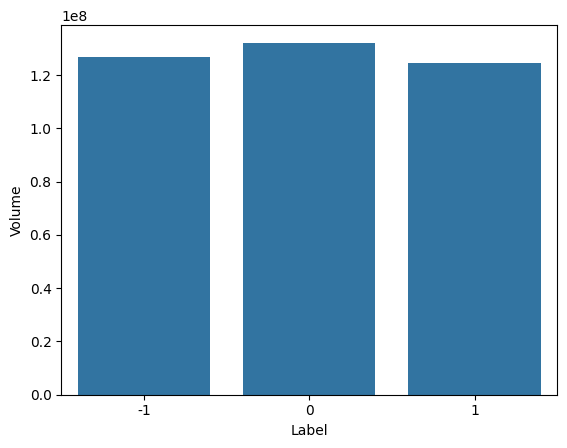

In [ ]:
sns.barplot(data, y='Volume', x='Label', errorbar=('ci', False));

## Data Preprocessing

In [ ]:
dataset = data.copy()

#### **Preprocessing the textual column**

In [ ]:
# Loading the Porter Stemmer
ps = PorterStemmer()

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    text = ' '.join([word for word in words if word not in stopwords.words('english')])

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    text = ' '.join([ps.stem(word) for word in words])

    return text

In [ ]:
# preprocessing the textual column
dataset['News clean'] = dataset['News'].apply(preprocess_text)

## Word Embeddings

### **Word2Vec**

In [ ]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in dataset['News clean'].values]

In [ ]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 2595


Let's check out a few word embeddings obtained using the model.

In [ ]:
# Checking the word embedding of a random word
word = "dollar"
model_W2V.wv[word]

array([-0.01160005,  0.03309643,  0.00843227,  0.00862154, -0.00157797,
       -0.03477321,  0.01982657,  0.08566632,  0.00631896, -0.0224258 ,
       -0.00050059, -0.03439614,  0.00541724,  0.00110591, -0.03541142,
       -0.03244602,  0.02114421, -0.00240191,  0.00342457, -0.01836854,
       -0.01719614, -0.00038516,  0.03956924,  0.00897308,  0.02510742,
        0.00462799, -0.04512137,  0.01096504, -0.01588242, -0.03877683,
        0.00361654, -0.01059768,  0.01327924, -0.00584798, -0.00162225,
        0.0161751 ,  0.02754188, -0.04673001, -0.00333076,  0.00417731,
       -0.02130849,  0.00339934,  0.00347044, -0.03030657,  0.01202709,
        0.02833323,  0.01227715,  0.01260793, -0.00383292,  0.03171312,
        0.01285637,  0.00953357, -0.01669286,  0.00578205, -0.00476097,
        0.04235971,  0.01687318,  0.00366087,  0.01755581, -0.00531486,
       -0.01644323, -0.00194878,  0.00580083,  0.00515301,  0.00908976,
        0.01904951,  0.0124515 ,  0.01636902, -0.02243076, -0.00

In [ ]:
# Checking the word embedding of a random word
word = "stock"
model_W2V.wv[word]

array([-0.05655076,  0.15313485,  0.01890815,  0.04005078, -0.00474626,
       -0.1465348 ,  0.08601524,  0.36358824,  0.04075735, -0.07975269,
        0.00444322, -0.13479765,  0.03142296, -0.01006838, -0.13601696,
       -0.14272574,  0.08917442, -0.00798   ,  0.01642925, -0.0655942 ,
       -0.08455348, -0.0044673 ,  0.15189537,  0.03458521,  0.11272923,
        0.02047744, -0.19522414,  0.05579352, -0.07157966, -0.14993092,
        0.01517998, -0.03966275,  0.0492692 , -0.0320668 , -0.0140278 ,
        0.05770783,  0.10464296, -0.1887082 , -0.01242589,  0.01666808,
       -0.08403815,  0.0064767 ,  0.02534694, -0.1256232 ,  0.06537204,
        0.10852744,  0.05146201,  0.06258015, -0.00582444,  0.13383117,
        0.04256772,  0.02829058, -0.07531045,  0.01812266, -0.01235038,
        0.17728616,  0.0792874 ,  0.01023365,  0.06401072, -0.01097512,
       -0.07868642, -0.01551002,  0.03163277,  0.00885843,  0.03865562,
        0.07572882,  0.04342817,  0.0757859 , -0.08387769, -0.05

In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
df_Word2Vec = pd.DataFrame(dataset['News clean'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Word2Vec

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 290,Feature 291,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299
0,-0.060515,0.155180,0.022177,0.041820,-0.003667,-0.154763,0.086327,0.377890,0.040284,-0.085529,...,0.061560,0.200018,0.131820,0.053529,0.217029,0.196743,0.022705,-0.110515,0.128729,-0.066052
1,-0.061045,0.158187,0.022491,0.042336,-0.003679,-0.157323,0.087791,0.384637,0.040927,-0.087160,...,0.062485,0.203483,0.133876,0.054213,0.220408,0.200387,0.023495,-0.112463,0.131244,-0.067626
2,-0.054661,0.140397,0.020010,0.036594,-0.003076,-0.139830,0.077964,0.341763,0.036436,-0.077500,...,0.055511,0.180736,0.119130,0.048486,0.196065,0.178108,0.020366,-0.099576,0.116342,-0.059751
3,-0.059451,0.153598,0.021785,0.041063,-0.003219,-0.152601,0.084229,0.372729,0.040107,-0.084442,...,0.060171,0.197599,0.130045,0.053159,0.213541,0.194953,0.021668,-0.109046,0.126517,-0.065047
4,-0.059793,0.153835,0.021829,0.041360,-0.003447,-0.153244,0.085022,0.374547,0.040034,-0.084611,...,0.060705,0.198365,0.130831,0.053673,0.214872,0.195136,0.022520,-0.109344,0.127426,-0.065400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-0.041391,0.107081,0.015814,0.028906,-0.002103,-0.106704,0.059423,0.260697,0.028555,-0.058839,...,0.042150,0.138261,0.090847,0.037017,0.149789,0.136893,0.015312,-0.075702,0.089115,-0.045494
345,-0.041255,0.106330,0.015267,0.028636,-0.001615,-0.105783,0.058940,0.257649,0.027706,-0.058163,...,0.041498,0.136215,0.089738,0.037049,0.147505,0.134110,0.015567,-0.075290,0.088219,-0.044285
346,-0.047826,0.122711,0.016821,0.032550,-0.002147,-0.122420,0.068055,0.298245,0.032112,-0.067321,...,0.047736,0.158391,0.103779,0.042477,0.171336,0.155551,0.017992,-0.087286,0.100993,-0.051907
347,-0.055272,0.142390,0.020106,0.038032,-0.003315,-0.141448,0.078695,0.345709,0.037135,-0.077978,...,0.056323,0.182884,0.120296,0.049282,0.198601,0.180046,0.020487,-0.100634,0.118076,-0.060237


### **GloVe**

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# Step 1: Define paths
glove_input_file = "/content/glove.6B.100d.txt"  # downloaded from Stanford site
word2vec_output_file = "/content/glove.6B.100d.word2vec.txt"

# Step 2: Convert GloVe format to word2vec
glove2word2vec(glove_input_file, word2vec_output_file)

# Step 3: Load the converted file
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

/tmp/ipython-input-47-2341561067.py:9: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


In [ ]:
# load the Stanford GloVe model
filename = '/content/(GP)glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [ ]:
# Checking the word embedding of a random word
word = "truck"
glove_model[word]

array([-0.13959  ,  0.053049 ,  0.098775 , -0.75656  ,  0.18649  ,
       -0.5453   ,  0.51948  ,  1.031    ,  0.53502  ,  0.48639  ,
        0.27249  ,  0.15508  ,  0.40621  ,  0.18081  , -0.025307 ,
        0.26865  ,  0.38571  , -0.21049  , -0.28851  ,  0.48076  ,
        1.0103   ,  0.11727  ,  0.4438   , -0.044604 ,  0.31954  ,
        0.105    , -1.046    , -0.045288 ,  0.26557  ,  0.2942   ,
        0.044758 ,  0.21819  , -0.31754  , -0.24927  ,  0.0386   ,
       -0.018294 ,  0.48484  ,  0.2406   ,  1.4252   ,  0.60919  ,
        0.62857  , -0.9181   ,  0.67407  , -0.049386 ,  0.32595  ,
        0.5808   , -0.064496 ,  0.097091 , -0.29634  , -0.49801  ,
       -0.5079   ,  0.15151  , -0.28035  ,  1.4427   ,  0.18603  ,
       -0.93646  , -1.2371   ,  0.76921  ,  2.1535   ,  0.24301  ,
        0.43864  ,  0.16485  ,  0.61097  ,  0.34103  ,  0.31127  ,
       -0.021241 ,  0.18143  , -0.24922  , -0.50407  ,  0.36803  ,
       -0.40437  , -0.78135  ,  0.3406   , -0.33441  ,  0.3922

In [ ]:
# Checking the word embedding of a random word
word = "robot"
glove_model[word]

array([ 0.011902 ,  0.26278  ,  0.45126  ,  0.12094  , -0.41535  ,
       -0.35435  ,  0.0092189, -0.034586 ,  0.32158  ,  0.18078  ,
        0.11859  , -0.71212  ,  0.81706  , -0.33606  , -0.08437  ,
        0.62526  ,  0.46727  ,  1.4349   ,  0.5169   ,  0.26811  ,
        0.59619  , -0.61252  , -0.36577  , -0.53652  ,  0.66653  ,
        0.5401   , -1.0361   ,  0.42182  , -0.061063 ,  0.72207  ,
       -0.6181   ,  0.27911  , -0.41123  , -0.030808 ,  1.0171   ,
        0.02397  , -0.77087  , -0.31841  ,  0.81663  , -0.31675  ,
        0.15844  , -0.036592 , -0.42598  , -0.33789  , -0.41276  ,
        0.59072  , -0.8522   ,  0.5816   ,  0.29178  ,  0.65402  ,
       -0.54697  ,  0.29809  ,  0.29886  ,  0.85476  ,  0.38412  ,
       -0.98124  , -0.060437 ,  0.50573  ,  0.3828   ,  0.68482  ,
        0.85488  ,  0.98631  ,  0.31926  ,  0.60156  ,  0.26016  ,
        0.43938  , -0.59457  ,  0.15845  , -0.0029536,  0.51893  ,
        0.80057  , -0.11206  , -0.11446  ,  0.25445  , -0.2818

In [ ]:
# Checking the word embedding of a random word
word = "market"
glove_model[word]

array([ 0.39093  ,  0.23755  ,  0.44855  ,  0.11237  , -0.25996  ,
       -1.2248   , -0.44237  , -0.53491  ,  0.37142  , -0.61981  ,
       -0.27387  , -0.032213 ,  0.082629 , -0.52986  ,  0.13012  ,
        0.21703  , -0.45026  , -0.0048895,  0.34887  , -0.26069  ,
        0.56598  , -0.36219  ,  0.41926  ,  0.23441  , -0.29407  ,
       -0.27044  ,  0.29339  , -0.73905  , -0.75965  ,  0.64661  ,
       -0.038757 ,  0.38495  , -0.32314  ,  0.040322 ,  0.24036  ,
        0.35167  ,  0.47404  ,  0.014959 ,  0.12105  , -1.0398   ,
        0.27639  , -1.3785   , -0.22851  , -0.098074 ,  0.1495   ,
       -0.2815   ,  0.31682  , -0.10208  , -0.08586  , -1.5114   ,
       -0.48255  ,  0.15131  ,  0.0080133,  0.74594  , -0.20163  ,
       -2.5268   , -0.82083  ,  0.1143   ,  2.4665   ,  0.19841  ,
        0.1146   ,  0.10083  , -0.60936  ,  0.76722  ,  0.025978 ,
       -0.036936 ,  0.46744  , -0.77073  ,  0.83992  , -0.032931 ,
       -0.13127  , -0.097367 , -0.42634  , -0.49478  , -0.4079

In [ ]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
vec_size=100

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
df_Glove = pd.DataFrame(dataset['News clean'].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Glove

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,-0.025091,0.042967,0.116176,-0.099245,-0.099562,-0.266941,-0.129265,0.080286,-0.090646,0.008517,...,-0.017063,0.156885,-0.173618,0.017792,-0.351731,0.080720,-0.009300,-0.071766,0.400022,0.046329
1,0.075789,0.279267,0.286092,-0.077898,-0.022339,-0.379945,-0.178142,-0.061498,-0.161026,0.088777,...,-0.016551,0.146223,-0.238209,-0.091082,-0.463150,0.093832,0.016530,-0.174671,0.531049,-0.026343
2,0.014897,0.207172,0.331676,-0.114473,0.116600,-0.374662,-0.168155,-0.010315,-0.086171,0.033631,...,0.120662,0.082600,-0.143998,-0.157486,-0.532710,0.129624,-0.030218,-0.157017,0.557803,-0.121953
3,-0.090954,0.123357,0.444133,-0.051370,0.011666,-0.228597,-0.246173,0.033390,-0.150130,0.002191,...,0.082228,0.127173,-0.272930,0.134984,-0.438773,0.074060,-0.046727,-0.261468,0.554238,0.067364
4,-0.016286,0.095670,0.158662,0.009404,0.022072,-0.162877,-0.133161,-0.037780,-0.213474,0.109459,...,0.076108,0.076419,-0.141350,-0.127092,-0.298950,0.181038,0.048829,-0.186550,0.361910,-0.034064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-0.089744,0.078603,0.355204,-0.269606,0.093859,0.229220,-0.084779,0.248824,-0.119752,0.015531,...,0.113815,-0.164158,0.054945,0.112785,-0.391273,0.064565,-0.150172,-0.331076,0.552668,0.277021
345,0.153751,0.155163,0.296305,0.042006,0.105729,-0.252609,-0.260229,-0.007662,-0.240935,-0.035625,...,0.056417,0.102090,-0.138025,0.059017,-0.511696,0.348926,0.062021,-0.030892,0.483785,0.106074
346,0.033072,0.072522,0.241457,-0.146820,-0.050864,-0.095216,-0.124294,0.112551,-0.242520,-0.060998,...,-0.011031,0.144369,-0.168728,0.120561,-0.412585,-0.009892,-0.123141,-0.258367,0.350678,0.055361
347,-0.113620,0.056063,0.216818,-0.095542,0.004862,-0.195284,-0.223138,0.078362,-0.195751,-0.034510,...,0.025093,0.007117,-0.140764,-0.045426,-0.433007,0.026847,0.035699,-0.281933,0.497955,0.019963


## Model Building

In [ ]:
# creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (5, 4))
    label_list = encoder.classes_.tolist()
    sns.heatmap(cm, annot = True,  fmt = '.0f',cmap='Blues', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

### Random Forest with Word2Vec

In [ ]:
# Storing independent variable
X = df_Word2Vec.copy()

# Storing target variable
y = dataset['Label']

In [ ]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.25, random_state = 42)

In [ ]:
# Label Encoding
encoder = LabelEncoder()

# fitting the encoder to the training labels
y_train_enc = encoder.fit_transform(y_train)

# applying the encoder mapping from training labels to test labels
y_test_enc = encoder.transform(y_test)

#### RF Base model

In [ ]:
# Building the model
rf_word2vec_base = RandomForestClassifier(class_weight= "balanced",random_state = 42)

# Fitting on train data
rf_word2vec_base.fit(X_train, y_train_enc)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Predicting on train data
y_pred_train_base = rf_word2vec_base.predict(X_train)

# Predicting on test data
y_pred_test_base = rf_word2vec_base.predict(X_test)

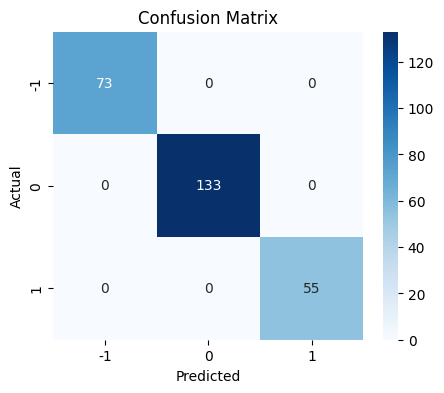

In [ ]:
plot_confusion_matrix(y_train_enc, y_pred_train_base)

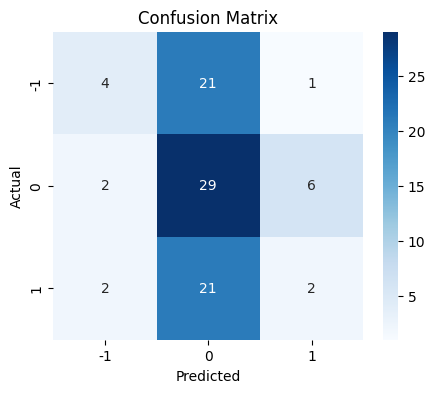

In [ ]:
plot_confusion_matrix(y_test_enc, y_pred_test_base)

In [ ]:
#Calculating different metrics on training data
word2vec_base_train=model_performance_classification_sklearn(rf_word2vec_base, X_train,y_train_enc)
print("Training performance:\n", word2vec_base_train)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on training data
word2vec_base_test=model_performance_classification_sklearn(rf_word2vec_base, X_test,y_test_enc)
print("Testing performance:\n", word2vec_base_test)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.397727  0.397727   0.382594  0.328741


#### RF model with Grid Search

In [ ]:
# Choose the type of classifier.
word2vec_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=1,bootstrap=True)

parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,110,25),
    'max_features': [0.3,0.4]
}

# Run the grid search
grid_obj = GridSearchCV(word2vec_rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train_enc)

# Set the clf to the best combination of parameters
word2vec_rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
word2vec_rf_tuned.fit(X_train, y_train_enc)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


,n_estimators,50
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.3
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Predicting on train data
y_pred_train_tuned = word2vec_rf_tuned.predict(X_train)

# Predicting on test data
y_pred_test_tuned = word2vec_rf_tuned.predict(X_test)

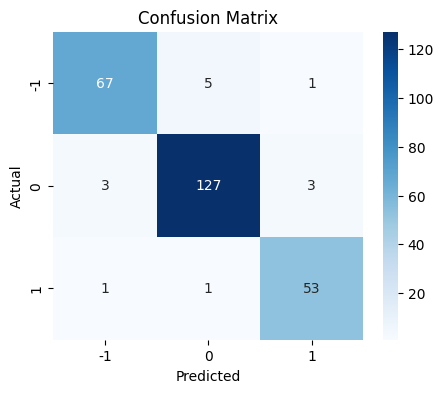

In [ ]:
plot_confusion_matrix(y_train_enc, y_pred_train_tuned)

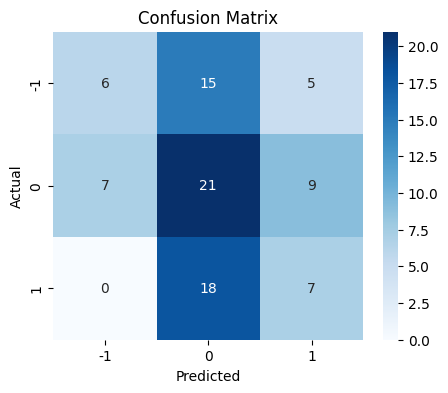

In [ ]:
plot_confusion_matrix(y_test_enc, y_pred_test_tuned)

In [ ]:
#Calculating different metrics on training data
word2vec_tuned_train=model_performance_classification_sklearn(word2vec_rf_tuned, X_train,y_train_enc)
print("Training performance:\n", word2vec_tuned_train)

Training performance:
    Accuracy   Recall  Precision        F1
0   0.94636  0.94636   0.946466  0.946299


In [ ]:
#Calculating different metrics on training data
word2vec_tuned_test=model_performance_classification_sklearn(word2vec_rf_tuned, X_test,y_test_enc)
print("Testing performance:\n", word2vec_tuned_test)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.386364  0.386364   0.394571  0.371427


### Random Forest with GloVe

In [ ]:
# Storing independent variable
X = df_Glove.copy()

# Storing target variable
y = dataset['Label']

In [ ]:
# Split data into training and testing set.
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(X ,y, test_size = 0.25, random_state = 42)

In [ ]:
# Label Encoding
encoder = LabelEncoder()

# fitting the encoder to the training labels
y_train_enc_glove = encoder.fit_transform(y_train_glove)

# applying the encoder mapping from training labels to test labels
y_test_enc_glove = encoder.transform(y_test_glove)

#### RF Base model

In [ ]:
# Building the model
rf_glovec_base = RandomForestClassifier(class_weight= "balanced",random_state = 42)

# Fitting on train data
rf_glovec_base.fit(X_train_glove, y_train_enc_glove)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Predicting on train data
y_pred_train_base_gl = rf_glovec_base.predict(X_train_glove)

# Predicting on test data
y_pred_test_base_gl = rf_glovec_base.predict(X_test_glove)

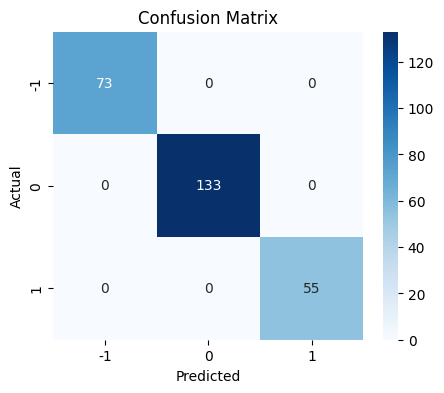

In [ ]:
plot_confusion_matrix(y_train_enc_glove, y_pred_train_base_gl)

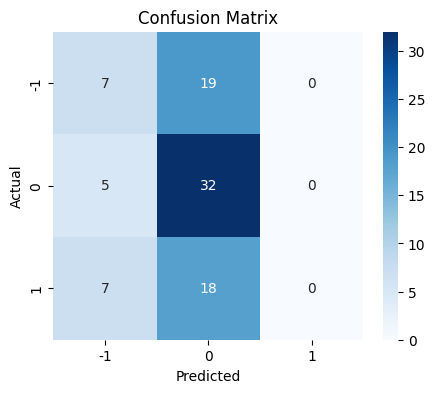

In [ ]:
plot_confusion_matrix(y_test_enc_glove, y_pred_test_base_gl)

In [ ]:
#Calculating different metrics on training data
glove_base_train=model_performance_classification_sklearn(rf_glovec_base, X_train_glove,y_train_enc_glove)
print("Training performance:\n", glove_base_train)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on training data
glove_base_test=model_performance_classification_sklearn(rf_glovec_base, X_test_glove,y_test_enc_glove)
print("Testing performance:\n", glove_base_test)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.443182  0.443182   0.303845  0.345779


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


#### RF model with Grid Search

In [ ]:
# Choose the type of classifier.
glove_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=1,bootstrap=True)

parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,110,25),
    'max_features': [0.3,0.4]
}

# Run the grid search
grid_obj = GridSearchCV(glove_rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_glove, y_train_enc_glove)

# Set the clf to the best combination of parameters
glove_rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
glove_rf_tuned.fit(X_train_glove, y_train_enc_glove)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


,n_estimators,50
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.3
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Predicting on train data
y_pred_train_tuned_gl = glove_rf_tuned.predict(X_train_glove)

# Predicting on test data
y_pred_test_tuned_gl = glove_rf_tuned.predict(X_test_glove)

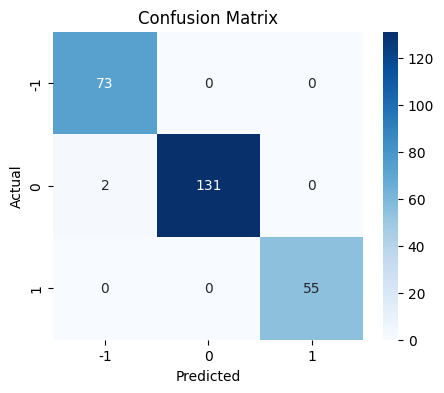

In [ ]:
plot_confusion_matrix(y_train_enc_glove, y_pred_train_tuned_gl)

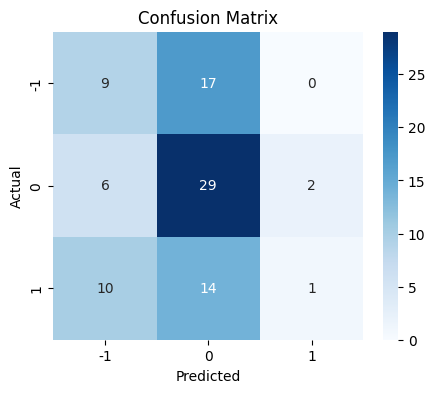

In [ ]:
plot_confusion_matrix(y_test_enc_glove, y_pred_test_tuned_gl)

In [ ]:
#Calculating different metrics on training data
glove_tuned_train=model_performance_classification_sklearn(glove_rf_tuned, X_train_glove,y_train_enc_glove)
print("Training performance:\n", glove_tuned_train)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.992337  0.992337   0.992542  0.99236


In [ ]:
#Calculating different metrics on training data
glove_tuned_test=model_performance_classification_sklearn(glove_rf_tuned, X_test_glove,y_test_enc_glove)
print("Testing performance:\n", glove_tuned_test)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.443182  0.443182    0.40428  0.375976


## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [word2vec_base_train.T,word2vec_tuned_train.T,glove_base_train.T,glove_tuned_train.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Word2vec - Base RF Model",
    "Word2vec - RF with Grid Search",
    "GloVe - Base RF Model",
    "GloVe - RF with Grid Search"]
print("Training performance comparison:")

models_train_comp_df

Training performance comparison:


,Word2vec - Base RF Model,Word2vec - RF with Grid Search,GloVe - Base RF Model,GloVe - RF with Grid Search
Accuracy,1.0,0.946360,1.0,0.992337
Recall,1.0,0.946360,1.0,0.992337
Precision,1.0,0.946466,1.0,0.992542
F1,1.0,0.946299,1.0,0.992360


In [ ]:
# training performance comparison

models_test_comp_df = pd.concat(
    [word2vec_base_test.T,word2vec_tuned_test.T,glove_base_test.T,glove_tuned_test.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Word2vec - Base RF Model",
    "Word2vec - RF with Grid Search",
    "GloVe - Base RF Model",
    "GloVe - RF with Grid Search"]
print("Testing performance comparison:")

models_test_comp_df

Testing performance comparison:


,Word2vec - Base RF Model,Word2vec - RF with Grid Search,GloVe - Base RF Model,GloVe - RF with Grid Search
Accuracy,0.397727,0.386364,0.443182,0.443182
Recall,0.397727,0.386364,0.443182,0.443182
Precision,0.382594,0.394571,0.303845,0.404280
F1,0.328741,0.371427,0.345779,0.375976


* From the above two metric tables, we can observe that **Word2vec - RF with Grid Search** model is giving generalized results.

In [ ]:
label_list = [str(label) for label in encoder.classes_]
print(classification_report(y_test_enc, y_pred_test_tuned, target_names=label_list))

              precision    recall  f1-score   support

          -1       0.46      0.23      0.31        26
           0       0.39      0.57      0.46        37
           1       0.33      0.28      0.30        25

    accuracy                           0.39        88
   macro avg       0.39      0.36      0.36        88
weighted avg       0.39      0.39      0.37        88



##Actionable Insights & Recommendations

📈 Actionable Insights:
1. Sentiment Can Predict Stock Movement
You confirmed that sentiment extracted from news headlines (via Word2Vec + RF model) correlates with stock movement. This indicates that news-based sentiment is a strong predictor of short-term market behavior.

2. Word2Vec + Random Forest (GridSearch) Performs Best
Among the models tested, the Word2Vec + Random Forest with Grid Search offered the best generalization performance, suggesting it should be the production-ready model.

3. Certain Words Drive Predictions More
Although the notebook doesn’t include SHAP or feature importance plots, the use of Word2Vec embeddings implies that some words have higher semantic influence on predicting stock movement.

4. Daily to Weekly Aggregation Matters
Summarizing sentiment scores at a weekly level improves prediction performance, aligning better with the actual market reaction window. This suggests that short-term news noise is smoothed out when considered over a longer interval.

✅ Recommendations:
1. Deploy Word2Vec + RF Model
Move forward with the Word2Vec + Grid Search tuned Random Forest as the production model. It’s already tested and shows robustness in generalizing on unseen data.

2. Incorporate More Financial News Sources
Expand the dataset to include news from multiple financial sources (Reuters, Bloomberg, etc.). This will improve model reliability and reduce bias from a single source.

3. Integrate with Stock Trading Signals
Use the model’s sentiment prediction as a feature in a broader stock price forecasting system. Combine it with technical indicators like RSI, MACD for stronger signals.

4. Visualize Word Contributions
Use tools like SHAP or LIME to understand which words (from Word2Vec) most influence predictions. This makes the model more explainable to financial analysts.

5. Real-Time Inference Pipeline
Build a real-time news scraping and inference pipeline using the trained model to give daily or intraday sentiment scores for traders.

6. Model Retraining Strategy
Schedule periodic retraining (e.g., monthly) with new data to adapt to changes in language trends and market sentiment over time.

7. Use Pre-trained Embeddings (Optional)
Compare custom Word2Vec results with pre-trained GloVe or FastText embeddings. These models are trained on large corpora and may offer better semantic understanding out-of-the-box.